- 목표
  - 학생 성적 데이터를 인공신경망 모델로 학습시켜보기!
  - keras 활용 모델링
  

In [1]:
!ls

drive  sample_data


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Ai_Deep_Learning

/content/drive/MyDrive/Colab Notebooks/Ai_Deep_Learning


In [3]:
!ls

 data					     flagged
'ex00_딥러닝 맛보기(동물 10종 분류).ipynb'   README.md
'ex01_닮은꼴 분석 앱 만들기.ipynb'	     student-mat.csv


### 데이터 로딩


In [4]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [5]:
# delimiter (구분자) : 데이터가 ';' 기호로 구분되어 있음!
studentData = pd.read_csv('student-mat.csv', delimiter=';')

In [6]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 문제와 답 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 문제 - studytime, 정답 - G3
X = studentData['studytime']
y = studentData['G3']

In [9]:
X.shape, y.shape

((395,), (395,))

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0)

### 신경망 모델 만들기
1. 신경만 구조 설계
2. 신경망 모델 학습(loss,optimizer) / 평가(metrics)방법 설정
3. 학습 및 학습과정 시각화
4. 모델 평가

In [11]:
# 1. 신경만 구조 설계
model = Sequential() # 딥러닝 모델을 구성하는 뼈대
model.add(InputLayer(input_shape=(1,))) # 입력층 (입력 데이터의 모양을 설정해주어야 함)
model.add(Dense(units= 3)) # 중간층
model.add(Dense(units= 5)) # 중간층
model.add(Dense(units= 1)) # 출력층


In [12]:
# 2. 신경망 모델 학습(loss, optimizer) / 평가(metrics) 방법 설정
model.compile( loss = 'mean_squared_error',
              optimizer ='SGD') # 최적화 방법

In [ ]:
# 3. 학습 및 학습과정 시각화
studentHistory = model.fit(X_train, y_train, epochs=100)

In [14]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

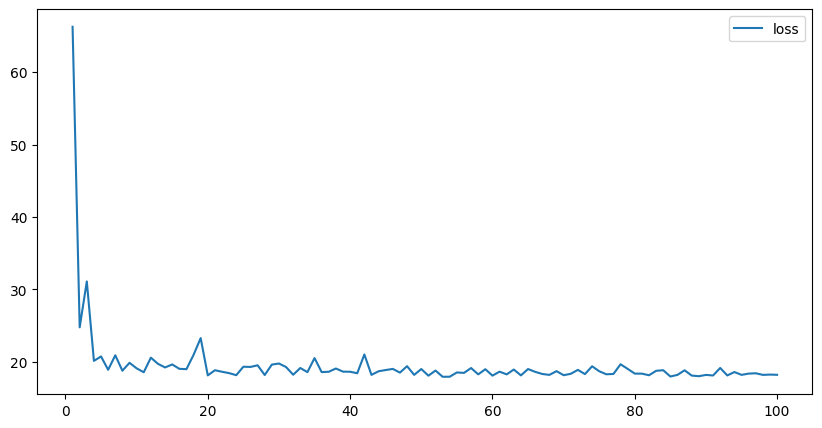

In [15]:
# 3-2 학습과정 시각화
plt.figure(figsize=(10,5))
plt.plot(range(1,101),studentHistory.history['loss'],label='loss')
plt.legend()
plt.show

In [16]:
# 4. 모델평가


model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 28.9414


28.94141387939453